# Random Forest: College Admission

## Step 1: Load the Data

In [107]:
import os
import urllib.request

data_location = "../data/college-admissions/admission-data.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/college-admissions/admission-data.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: admission-data.csv


In [108]:
import pandas as pd

dataset = pd.read_csv(data_location)
dataset

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
95,0,660,3.33,2
96,0,640,3.52,4
97,0,480,3.57,2
98,0,700,2.88,2


## Step 2 : Basic Analysis

### 2.1 Look at data split by 'admit' colunm
Looks like a resaonble distribution

In [109]:
## TODO : group by 'admit' column
dataset.groupby('admit').size()

admit
0    57
1    43
dtype: int64

### 2.2 Summary of data
use 'describe' function

In [110]:
## TODO : use 'describe'
dataset.describe()

,admit,gre,gpa,rank
count,100.00000,100.000000,100.000000,100.000000
mean,0.43000,600.000000,3.390700,2.520000
std,0.49757,124.462481,0.397188,1.019804
min,0.00000,300.000000,2.420000,1.000000
25%,0.00000,520.000000,3.127500,2.000000
50%,0.00000,600.000000,3.350000,2.000000
75%,1.00000,700.000000,3.675000,3.000000
max,1.00000,800.000000,4.000000,4.000000


## Step 3: Build feature vectors

In [111]:
## TODO : 
## input feature vector is  :  'gre', 'gpa', 'rank'
input_columns = ['gre', 'gpa', 'rank']
x = dataset[input_columns]

## TODO : label vector is 'admit'
y = dataset['admit']

print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (100, 3)
y :  (100,)


## Step 4: Split Data into training and test.

We will split our the data up into training and test.  (You know the drill by now).

In [112]:
## TODO: Use training / test split of 80%/20%

from sklearn.model_selection import train_test_split

#x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
## to control train/test split set random_state to a number
x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=23, test_size=0.3)

print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (70, 3)
x_test : (30, 3)
y_train : (70,)
y_test : (30,)


## Step 5: Random Forest

In [113]:
%%time
## TODO : Create a DecisionTree model 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

## TODO : train on (x_train, y_train)
model = rf.fit(x_train, y_train)
print(model)

RandomForestClassifier()
CPU times: user 150 ms, sys: 1.77 ms, total: 151 ms
Wall time: 153 ms


## Step 6 : Get Predictions on Test

In [114]:
## TODO : Get predictions on test data
## Hint : 'test' set name
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [115]:
import pandas as pd

a = pd.DataFrame({'label' : y_test, 'prediction': y_pred})
a

,label,prediction
26,1,1
80,0,0
82,0,0
68,0,0
77,1,1
37,0,0
3,0,0
55,1,1
20,0,0
17,0,0


## Step 7: Evaluate the model.

Let us check to see how the model did, using accuracy as a measure.

### 7.1 Model Accuracy

In [116]:
train_accuracy = model.score(x_train,y_train)
## TODO : score with (x_test, y_test)
test_accuracy = model.score(x_test, y_test)

print ("Train accuracy: ", train_accuracy)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.8333333333333334


In [117]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8333333333333334

### 7.2 Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  1],
       [ 4,  8]])

[]

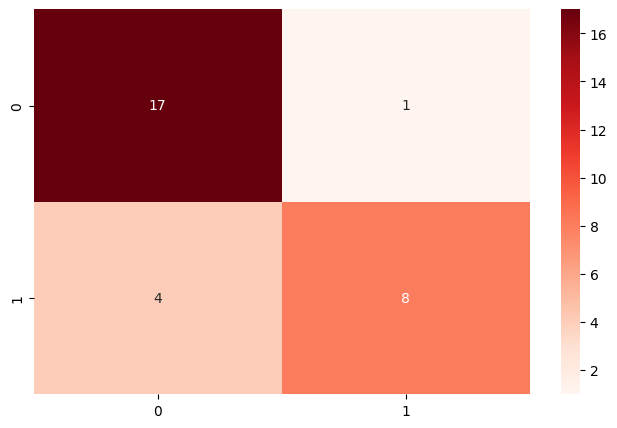

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

## Step 8 Feature Importances

How important were our features?

check out model.feature_importances_

What can you conclude?



In [120]:
model.feature_importances_

array([0.46281651, 0.43467722, 0.10250627])

In [121]:
feature_importantance_df = pd.DataFrame({'feature' : input_columns, 'importantance' : model.feature_importances_})

feature_importantance_df.sort_values(['importantance'], ascending=False)

,feature,importantance
0,gre,0.462817
1,gpa,0.434677
2,rank,0.102506


## Step 9: Do a Few Runs
- Click 'Cell --> Run All'
- Observe how the 'accuracy' output changes above
- Why?  Can we get the same accuracy all the times?

To get 'consistant' split for testing and random data you can set the seed variable random_state
   
```python
x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

```

## Step-10: Hyper Parameter Tuning

Let's use crossvalidation to get the best parameters for the tree!



In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_param = {
    "n_estimators" : [50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(2,10,2),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs =-1,
                           verbose = 1)

In [123]:
%%time

grid_search.fit(x,y)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
CPU times: user 1min 1s, sys: 4.24 s, total: 1min 5s
Wall time: 42min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [50, 100]},
             verbose=1)

## Create the Best Tree

In [124]:
# Find the best params
print("best model", grid_search.best_estimator_)
print("best parameters", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

best model RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=50)
best parameters {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 50}
best score:  0.8300000000000001


In [125]:
%%time 

#  Use the best params
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(
                            n_estimators = grid_search.best_params_['n_estimators'],
                            criterion = grid_search.best_params_['criterion'], 
                            max_depth = grid_search.best_params_['max_depth'],  
                            min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                            min_samples_split = grid_search.best_params_['min_samples_split'], 
                            max_features = grid_search.best_params_['max_features'])

cv_results = cross_validate(estimator= rf, 
                            X=x, 
                            y=y, 
                            cv=10, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)


CPU times: user 94.6 ms, sys: 21.9 ms, total: 117 ms
Wall time: 2.38 s


In [126]:
cv_results

{'fit_time': array([0.11720252, 0.1183629 , 0.11919618, 0.14387369, 0.11778235,
        0.11415887, 0.12301731, 0.11785054, 0.1135602 , 0.12246323]),
 'score_time': array([0.03294158, 0.04002261, 0.03800368, 0.03031826, 0.02962947,
        0.03782535, 0.03044105, 0.03655338, 0.0314889 , 0.02273726]),
 'estimator': [RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                         min_samples_split=5, n_estimators=50),
  RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                         min_samples_split=5, n_estimators=50),
  RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                         min_samples_split=5, n_estimators=50),
  RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                         min_samples_split=5, n_estimators=50),
  RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                         min_

In [127]:
from numpy import mean
from scipy import stats

print ("accuracy range = ",  min(cv_results['test_accuracy']),  " to ", max(cv_results['test_accuracy']))
print ("average accuracy : ", mean(cv_results['test_accuracy']))
print ("trim 10% accuracy : ", stats.trim_mean(cv_results['test_accuracy'], 0.1))

accuracy range =  0.5  to  1.0
average accuracy :  0.78
trim 10% accuracy :  0.7875


[[56  1]
 [ 4 39]]


[]

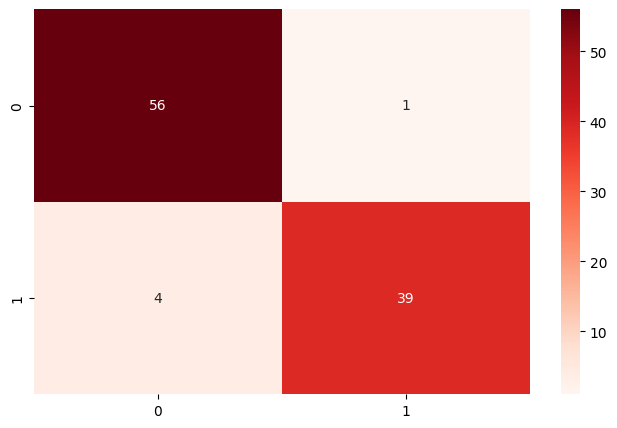

In [128]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred)
print (cm)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()